In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

In [39]:
df = pd.read_csv("../data/KOSPI.csv")
df.head()

,Date,KOSPI_index,Volume,Transaction_Amount,Market_Cap,Credit_Balance_KOSPI,Credit_Ratio_to_MarketCap,Credit_Change_Ratio_to_Transaction
0,2025-05-22,2593.67,35806.0,89655.0,21260119.0,10383768,0.488415,NaN
1,2025-05-21,2625.58,37153.0,74411.0,21516055.0,10349223,0.481000,-0.464246
2,2025-05-20,2601.80,45699.0,76614.0,21335074.0,10320861,0.483751,-0.370193
3,2025-05-19,2603.42,31330.0,67524.0,21348538.0,10314544,0.483150,-0.093552
4,2025-05-16,2626.87,35971.0,80250.0,21544355.0,10236751,0.475148,-0.969383


In [40]:
# 5일 전 대비 변화율 계산
df['5days_return'] = df['KOSPI_index'].pct_change(periods=5)
event = df[df['5days_return'] <= -0.03]
print(event.shape[0])

257


/var/folders/_h/70z4qq3n5p3_x1hqtbcqs_hw0000gn/T/ipykernel_44207/1277859520.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['5days_return'] = df['KOSPI_index'].pct_change(periods=5)


### EPV(Events-Per-Variable) 규칙
|모델 유형|권장 EPV(양의 이벤트/추정계수)| 최소한의 허용 변수 수|
|---|---|---|
|표준 로지스틱| 10 이상(Peduzzi et al.)|257/10= 25.7|
|LASSO, RIDGE| 5 이상 (van Smeden et al.)|257/5= 51.4|


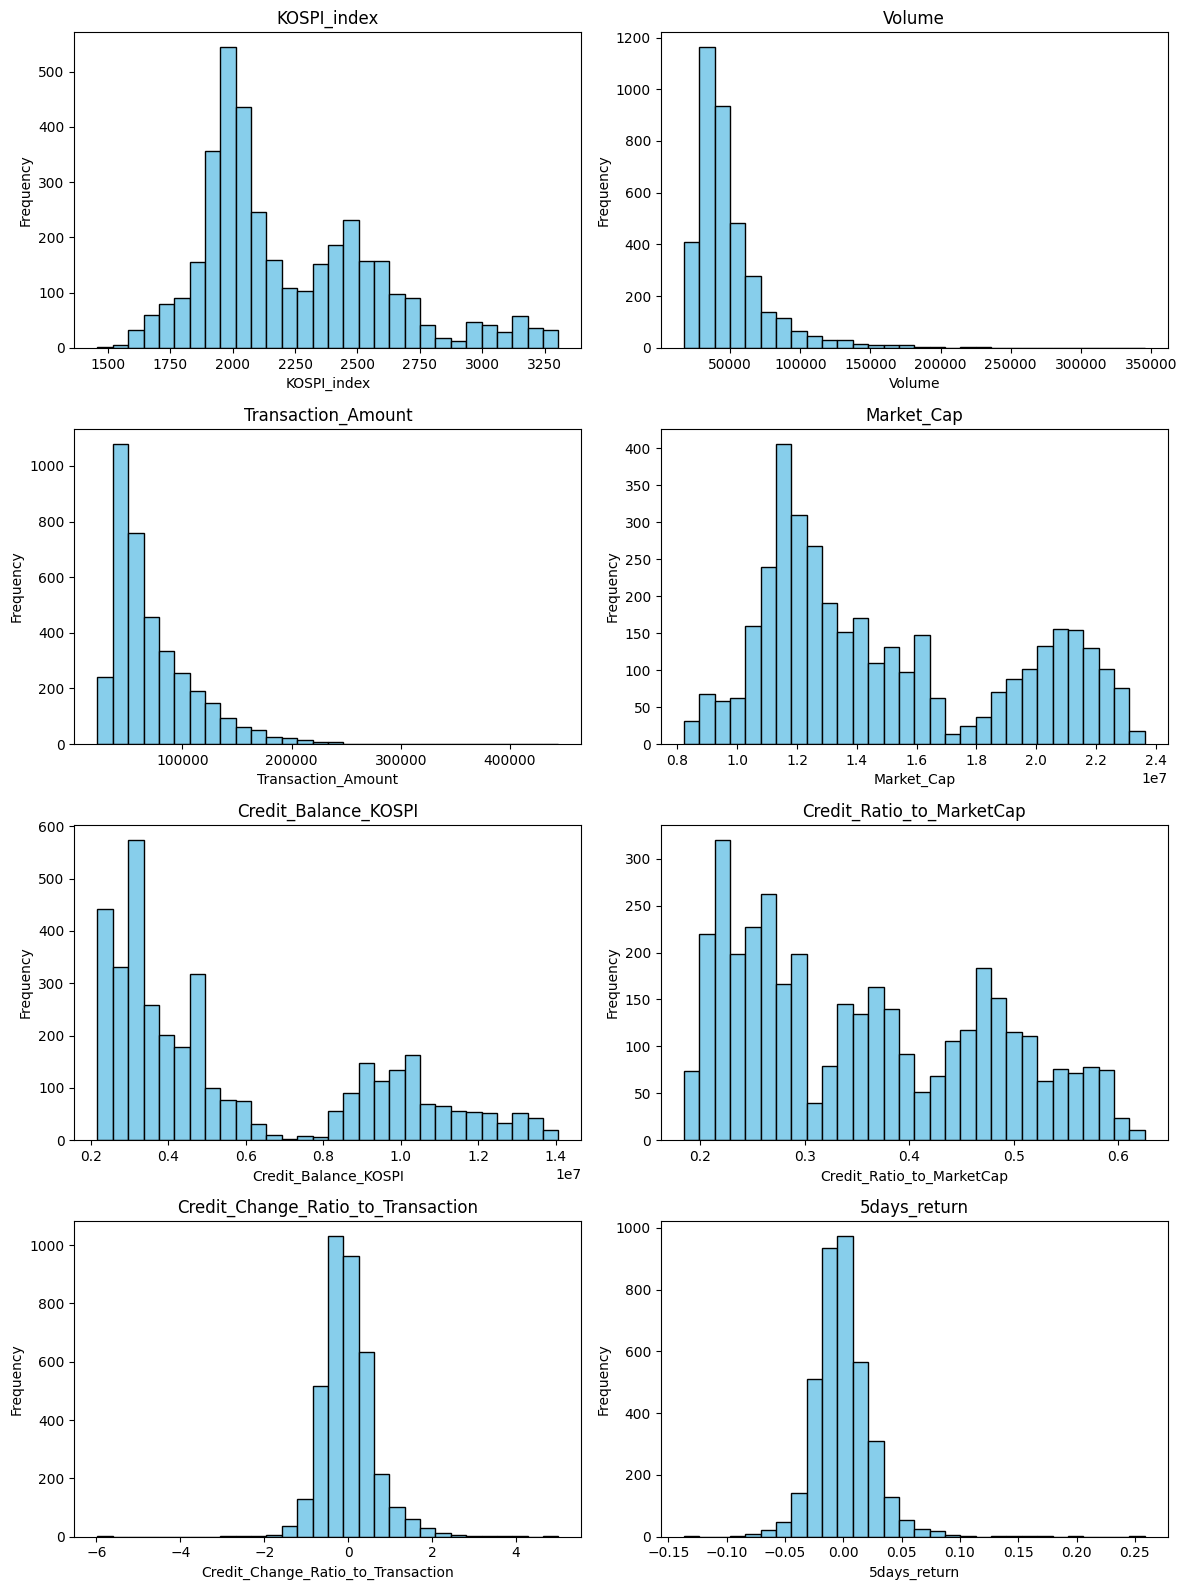

In [41]:
# 숫자형 열만 추출
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 서브플롯 설정: 한 줄에 2개씩, 전체 변수 수만큼 행 구성
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))  # 크기는 행 수에 따라 자동 조정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    data = df[col].dropna()
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 분포에 따른 로그 정규화
| 변수명                           | 분포 특성      | 추천 변환 방법                   | 비고                                   |
|----------------------------------|:--------------|:---------------------------------|:---------------------------------------|
| KOSPI_index                      | 약간 비대칭    | 표준화(StandardScaler)           | 로그변환 불필요                        |
| Volume                           | 오른쪽 꼬리   | 로그변환(log1p) + 표준화         | log1p(0도 안전)                        |
| Transaction_Amount               | 오른쪽 꼬리   | 로그변환(log1p) + 표준화         | log1p                                  |
| Market_Cap                       | 멀티모달      | 표준화                           | 로그변환 필요성 낮음                   |
| Credit_Balance_KOSPI             | 오른쪽 꼬리   | 로그변환(log1p) + 표준화         | log1p                                  |
| Credit_Ratio_to_MarketCap        | 오른쪽 꼬리   | 표준화                           | 0~1 비율형, 로그변환 불필요            |
| Credit_Change_Ratio_to_Transaction| 꼬리 큼       | 이상치 처리(IQR 등) + 표준화      | 로그변환보단 이상치 처리 우선           |
| 5days_return                     | 대칭(정규)    | 표준화(옵션)                     | 정규분포 유사, 변환 필요 적음           |


In [42]:
df['Volume'] = np.log1p(df['Volume'])
df['Transaction_Amount'] = np.log1p(df['Transaction_Amount'])
df['Credit_Balance_KOSPI'] = np.log1p(df['Credit_Balance_KOSPI'])

scaler = StandardScaler()
cols_to_scale = ['Volume', 'Transaction_Amount', 'Market_Cap', 'Credit_Balance_KOSPI','Credit_Ratio_to_MarketCap','Credit_Change_Ratio_to_Transaction','5days_return']
df_scaled=pd.DataFrame(scaler.fit_transform(df[cols_to_scale]), columns = cols_to_scale)

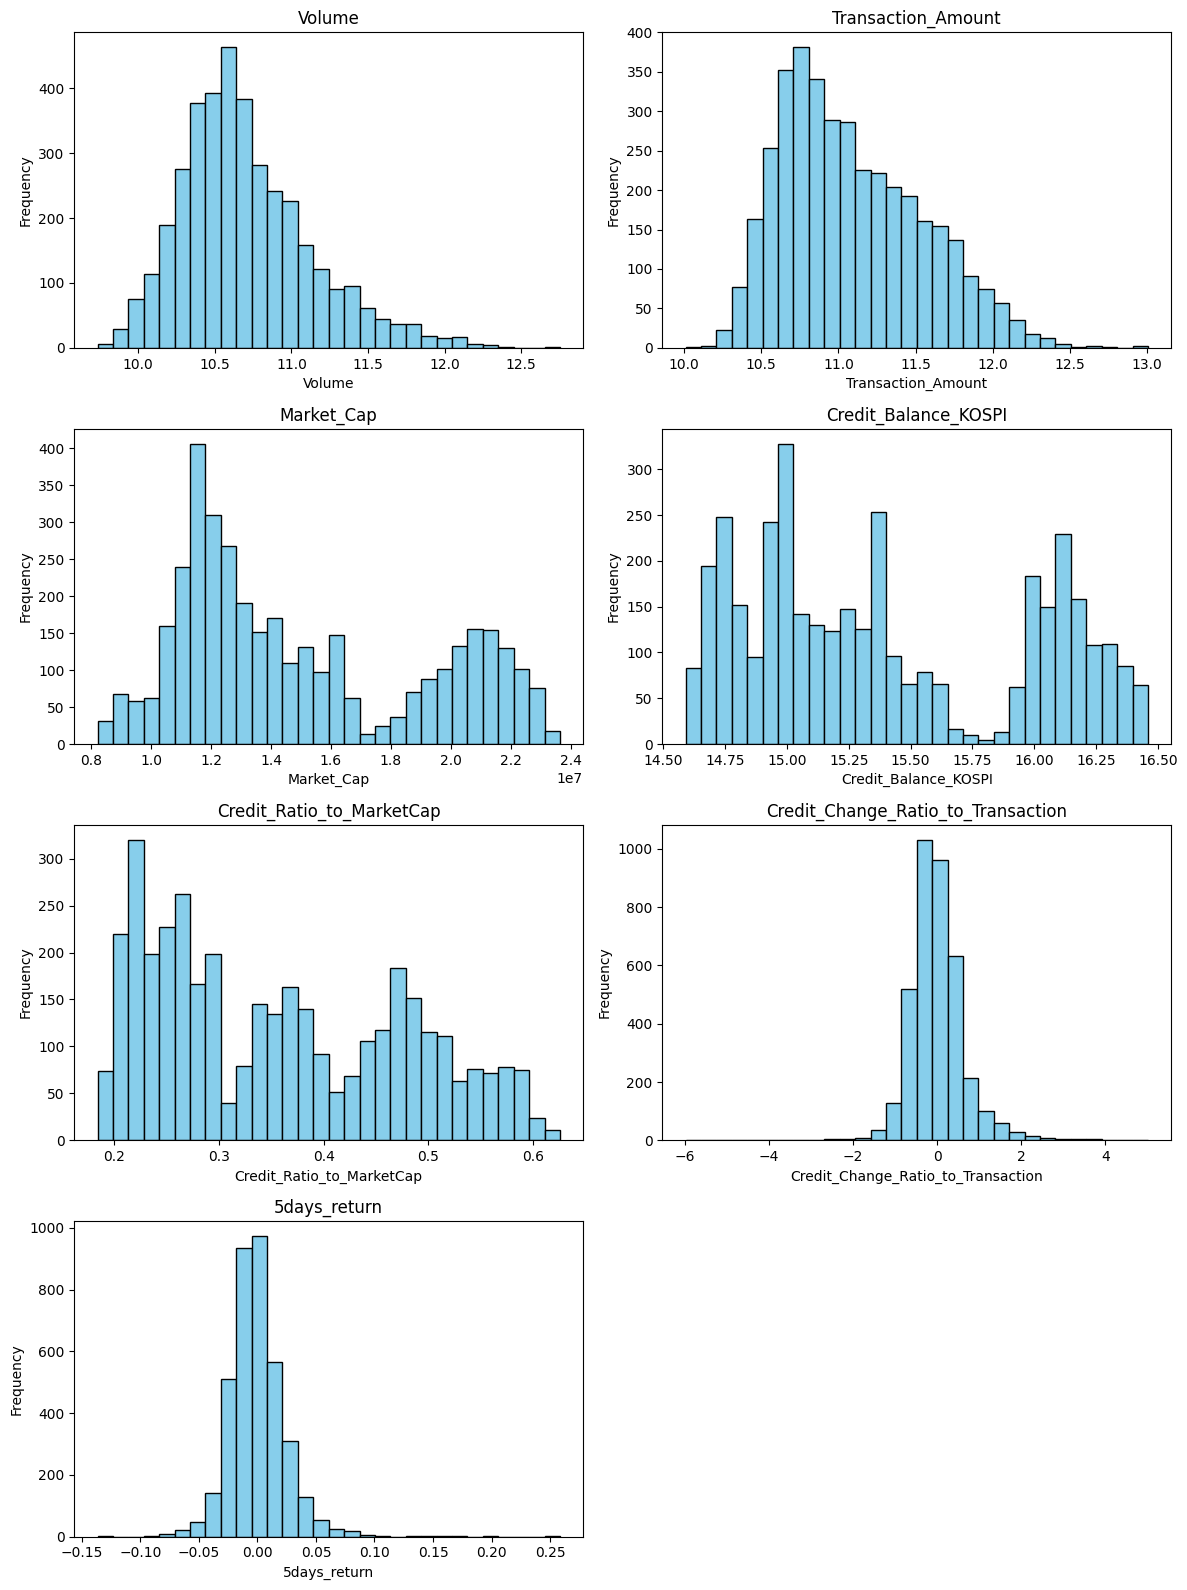

In [43]:
# 로그 변환 및 정규화 적용 후
# 숫자형 열만 추출
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# 서브플롯 설정: 한 줄에 2개씩, 전체 변수 수만큼 행 구성
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))  # 크기는 행 수에 따라 자동 조정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    data = df[col].dropna()
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()